In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [2]:
trainM = pd.read_csv("C:\\Users\\Sony\\Downloads\\BA classes\\class 20 - final assign\\6. WALMART STORE PREDICTION - FORECASTING\\trainMerged.csv")
trainM.head(5)

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,05-02-2010,False,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,05-02-2010,False,26,11737.12,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,05-02-2010,False,17,13223.76,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,05-02-2010,False,45,37.44,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,05-02-2010,False,28,1085.29,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


#### Sorting and Creating the variables

In [3]:
train = trainM.sort_values(['Store','Dept'],ascending = True)

In [4]:
train.shape

(421570, 16)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null object
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [6]:
import datetime

train["Date"] = pd.to_datetime(train["Date"])

# set 'Yr_Mo_Dy' as the index
train = train.set_index('Date')

train.head()

,Store,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,,,,,
2010-05-02,1,False,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2010-12-02,1,True,1,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2010-02-19,1,False,1,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
2010-02-26,1,False,1,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
2010-05-03,1,False,1,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [7]:
train['date'] = train.index
train.head()

,Store,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,date
Date,,,,,,,,,,,,,,,,
2010-05-02,1,False,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010-05-02
2010-12-02,1,True,1,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010-12-02
2010-02-19,1,False,1,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010-02-19
2010-02-26,1,False,1,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010-02-26
2010-05-03,1,False,1,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010-05-03


In [8]:
#trainM['quarter'] = trainM['date'].apply(lambda date: date.quater)
train['month'] = train['date'].apply(lambda date: date.month)
train['year'] = train['date'].apply(lambda date: date.year)
train['day'] = train['date'].apply(lambda date: date.day)
train.head()

,Store,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,date,month,year,day
Date,,,,,,,,,,,,,,,,,,,
2010-05-02,1,False,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010-05-02,5,2010,2
2010-12-02,1,True,1,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010-12-02,12,2010,2
2010-02-19,1,False,1,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010-02-19,2,2010,19
2010-02-26,1,False,1,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010-02-26,2,2010,26
2010-05-03,1,False,1,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010-05-03,5,2010,3


In [9]:
train['Quarter'] = pd.PeriodIndex(train['date'], freq='Q-FEB').strftime('Q%q')

In [10]:
train.tail()

,Store,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,date,month,year,day,Quarter
Date,,,,,,,,,,,,,,,,,,,,
2012-09-28,45,False,98,508.37,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012-09-28,9,2012,28,Q3
2012-05-10,45,False,98,628.10,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012-05-10,5,2012,10,Q1
2012-12-10,45,False,98,1061.02,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012-12-10,12,2012,10,Q4
2012-10-19,45,False,98,760.01,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012-10-19,10,2012,19,Q3
2012-10-26,45,False,98,1076.80,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,2012-10-26,10,2012,26,Q3


In [10]:
train['y-m'] = train['date'].apply(lambda x: '{0}-{1}'.format(x.year, x.isocalendar()[1]))

In [12]:
train.tail()

,Store,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,date,month,year,day,Quarter,y-m
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-28,45,False,98,508.37,B,118221,64.88,3.997,4556.61,20.64,...,1601.01,3288.25,192.013558,8.684,2012-09-28,9,2012,28,Q3,2012-39
2012-05-10,45,False,98,628.10,B,118221,64.89,3.985,5046.74,NaN,...,2253.43,2340.01,192.170412,8.667,2012-05-10,5,2012,10,Q1,2012-19
2012-12-10,45,False,98,1061.02,B,118221,54.47,4.000,1956.28,NaN,...,599.32,3990.54,192.327265,8.667,2012-12-10,12,2012,10,Q4,2012-50
2012-10-19,45,False,98,760.01,B,118221,56.47,3.969,2004.02,NaN,...,437.73,1537.49,192.330854,8.667,2012-10-19,10,2012,19,Q3,2012-42
2012-10-26,45,False,98,1076.80,B,118221,58.85,3.882,4018.91,58.08,...,211.94,858.33,192.308899,8.667,2012-10-26,10,2012,26,Q3,2012-43


#### Data Pre-processing steps

In [13]:
train.columns

Index(['Store', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'date', 'month',
       'year', 'day', 'Quarter', 'y-m'],
      dtype='object')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-05-02 to 2012-10-26
Data columns (total 21 columns):
Store           421570 non-null int64
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
date            421570 non-null datetime64[ns]
month           421570 non-null int64
year            421570 non-null int64
day             421570 non-null int64
Quarter         421570 non-null object
y-m             421570 non-null object
dtypes: bool(1), datetime64[ns](1), float64(

In [14]:
train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,year,day
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,6.478580,2010.968591,15.644061
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,3.324757,0.796876,8.753493
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,4.000000,2010.000000,8.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,6.000000,2011.000000,16.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,9.000000,2012.000000,23.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,12.000000,2012.000000,31.000000


In [30]:
train.columns

Index(['Store', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'date', 'month',
       'year', 'day', 'Quarter', 'y-m', 'Superbowl', 'Laborday',
       'Thanksgiving', 'Christmas'],
      dtype='object')

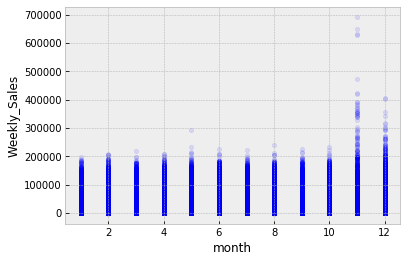

In [15]:
# Pandas scatter plot
train.plot(kind='scatter', x='month', y='Weekly_Sales', alpha=0.1)

In [16]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'month', 'year', 'day']
['Type', 'Quarter', 'y-m']


In [17]:
train_num=train[numeric_var_names]
train_num.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,year,day
Date,,,,,,,,,,,,,,,,
2010-05-02,1,1,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2010,2
2010-12-02,1,1,46039.49,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,12,2010,2
2010-02-19,1,1,41595.55,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,2010,19
2010-02-26,1,1,19403.54,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,2010,26
2010-05-03,1,1,21827.90,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,5,2010,3


In [18]:
train_cat=train[cat_var_names]
train_cat.head(5)

,Type,Quarter,y-m
Date,,,
2010-05-02,A,Q1,2010-17
2010-12-02,A,Q4,2010-48
2010-02-19,A,Q4,2010-7
2010-02-26,A,Q4,2010-8
2010-05-03,A,Q1,2010-18


In [19]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [20]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [21]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(lambda x: cat_summary(x))

In [22]:
cat_summary

,Type,Quarter,y-m
N,421570,421570,421570
NMISS,0,0,0
ColumnsNames,A 215478 B 163495 C 42597 Name: Type...,Q1 114888 Q2 108729 Q3 103318 Q4 ...,2011-37 5956 2012-23 5944 2011-6 594...


In [23]:
#Detailed profiling using pandas profiling
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
pandas_profiling.ProfileReport(train)

C:\Users\Sony\Anaconda4\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Sony\Anaconda4\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Sony\Anaconda4\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Sony\Anaconda4\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\Sony\Anac

Populating the interactive namespace from numpy and matplotlib


Number of variables,22
Number of observations,421570
Total Missing (%),15.3%
Total size in memory,67.9 MiB
Average record size in memory,169.0 B
Numeric,16
Categorical,3
Boolean,1
Date,2
Text (Unique),0
Rejected,0


<Figure size 720x540 with 0 Axes>

In [24]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

train_num=train_num.apply(lambda x: Missing_imputation(x))

In [25]:
train_num.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,year,day
Date,,,,,,,,,,,,,,,,
2010-05-02,1,1,24924.50,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,5,2010,2
2010-12-02,1,1,46039.49,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,12,2010,2
2010-02-19,1,1,41595.55,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,2,2010,19
2010-02-26,1,1,19403.54,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,2,2010,26
2010-05-03,1,1,21827.90,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,5,2010,3


In [28]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

train_num=train_num.apply(lambda x: outlier_capping(x))

In [26]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [27]:
#for c_feature in categorical_features
train_cat= train[['Type', 'Quarter','Dept','month']]

for c_feature in ['Type', 'Quarter','Dept','month']:
    train_cat[c_feature] = train_cat[c_feature].astype('category')
    train_cat = create_dummies(train_cat , c_feature )

C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
train_cat.head()

,Type_B,Type_C,Quarter_Q2,Quarter_Q3,Quarter_Q4,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-02,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2010-12-02,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-19,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-02-26,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-05-03,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
train_new = pd.concat([train_num, train_cat], axis=1)

In [31]:
train_new.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-02,1.0,1.0,24924.50,151315.0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,...,0,0,1,0,0,0,0,0,0,0
2010-12-02,1.0,1.0,46039.49,151315.0,38.51,2.565,7246.420196,3334.628621,1439.421384,3383.168256,...,0,0,0,0,0,0,0,0,0,1
2010-02-19,1.0,1.0,41595.55,151315.0,39.93,2.565,7246.420196,3334.628621,1439.421384,3383.168256,...,0,0,0,0,0,0,0,0,0,0
2010-02-26,1.0,1.0,19403.54,151315.0,46.63,2.565,7246.420196,3334.628621,1439.421384,3383.168256,...,0,0,0,0,0,0,0,0,0,0
2010-05-03,1.0,1.0,21827.90,151315.0,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,...,0,0,1,0,0,0,0,0,0,0


In [32]:
train_new.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=112)

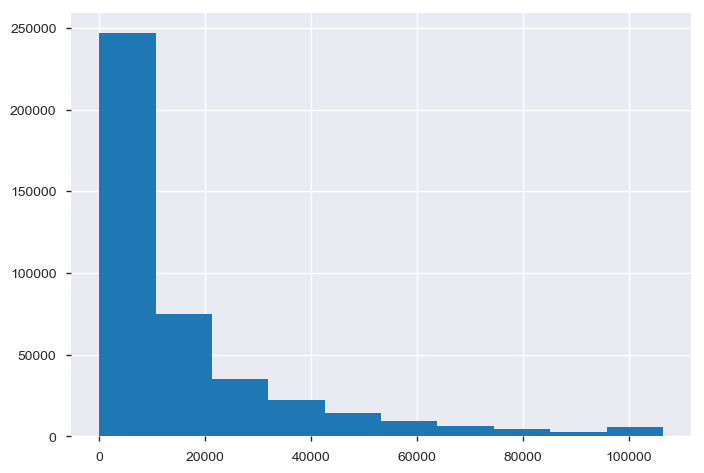

In [33]:
train_new.Weekly_Sales.hist()

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


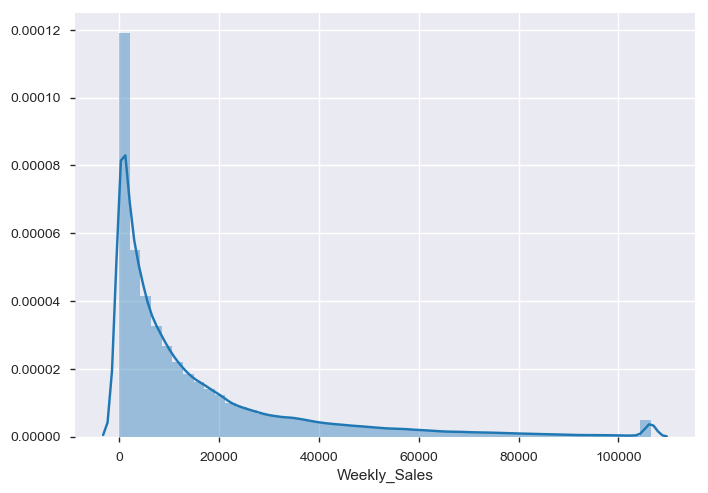

In [34]:
import seaborn as sns
sns.distplot(train_new.Weekly_Sales)

In [35]:
train_new["ln_Weekly_Sales"]= np.log(train_new["Weekly_Sales"]+1)


In [53]:
train_new.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       ...
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'ln_Weekly_Sales'],
      dtype='object', length=113)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


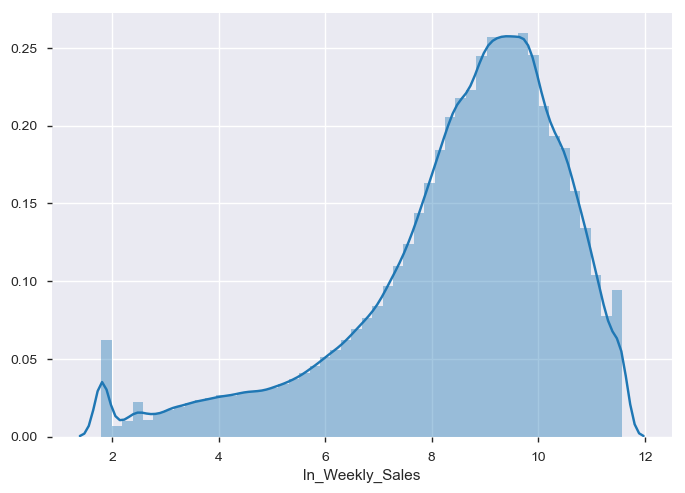

In [36]:
sns.distplot(train_new.ln_Weekly_Sales)

In [38]:
#Dropping the variables
train_new=train_new.drop(['Weekly_Sales'],axis=1)

In [39]:
train_new.columns

Index(['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       ...
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'ln_Weekly_Sales'],
      dtype='object', length=112)

In [40]:
corrm=train_new.corr()

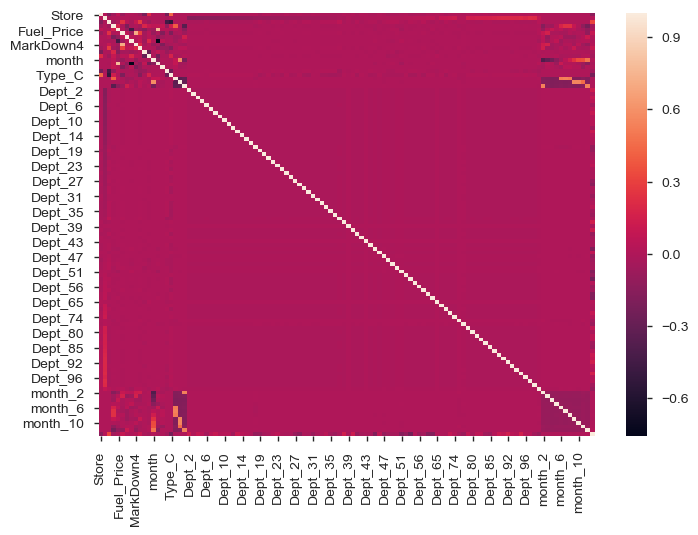

In [41]:
sns.heatmap(train_new.corr())

In [42]:
#Splitting the data
feature_columns = train_new.columns.difference( ['ln_Weekly_Sales', 'Weekly_Sales'] )
feature_columns

Index(['CPI', 'Dept', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'year'],
      dtype='object', length=111)

In [44]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(train_new[feature_columns],
                                                    train_new['ln_Weekly_Sales'],
                                                    test_size = 0.3,
                                                    random_state = 1234 )

In [46]:
print (len( train_X ))
print (len( test_X))

295099
126471


#### Applying the Linear Regression model

In [47]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     5647.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:32:34   Log-Likelihood:            -4.6443e+05
No. Observations:              295099   AIC:                         9.291e+05
Df Residuals:                  294992   BIC:                         9.302e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          138.6631     11.695     11.857   

In [49]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const           138.663141
CPI              -0.001311
Dept             -0.029137
Dept_10          -0.268896
Dept_11          -0.274241
Dept_12          -1.642073
Dept_13           0.897661
Dept_14          -0.073927
Dept_16          -0.340295
Dept_17          -0.513647
Dept_18          -2.665908
Dept_19          -2.882727
Dept_2            0.879761
Dept_20          -1.219536
Dept_21          -0.834323
Dept_22          -0.355261
Dept_23           0.265824
Dept_24          -0.838024
Dept_25          -0.727934
Dept_26          -0.651641
Dept_27          -2.133012
Dept_28          -2.861107
Dept_29          -0.749910
Dept_3           -0.782611
Dept_30          -1.002263
Dept_31          -1.730210
Dept_32          -0.674526
Dept_33          -0.543391
Dept_34           0.425176
Dept_35          -1.211379
                   ...    
Dept_99          -3.138338
Fuel_Price        0.026104
MarkDown1         0.000005
MarkDown2        -0.000008
MarkDown3        -0.000039
MarkDown4      

In [50]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print ('R-squre:', metrics.r2_score(test_y, y_pred))

MAE: 0.7616321634332681
MSE: 1.3635243708159115
RMSE: 1.1677004627968217
R-squre: 0.6698219166151492


In [51]:
#Dropping the variables
train_new=train_new.drop(['Dept_85','day'],axis=1)

#### Removing the insignificant variables and applying the model (same steps)

In [53]:
#Splitting the data

feature_columns = train_new.columns.difference( ['ln_Weekly_Sales', 'Weekly_Sales'] )
feature_columns

Index(['CPI', 'Dept', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'year'],
      dtype='object', length=109)

In [54]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(train_new[feature_columns],
                                                    train_new['ln_Weekly_Sales'],
                                                    test_size = 0.3,
                                                    random_state = 1234 )

In [55]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     5701.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:40:51   Log-Likelihood:            -4.6443e+05
No. Observations:              295099   AIC:                         9.291e+05
Df Residuals:                  294993   BIC:                         9.302e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          138.3000     11.693     11.828   

In [57]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print ('R-squre:', metrics.r2_score(test_y, y_pred))

MAE: 0.76163159179551
MSE: 1.363516455151602
RMSE: 1.1676970733677472
R-squre: 0.6698238333970759


In [58]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
linreg.coef_

array([-9.95346491e-13, -1.31111514e-03, -2.94045796e-02, -2.66432674e-01,
       -2.71529306e-01, -1.63909102e+00,  9.00934427e-01, -7.03684503e-02,
       -3.36216117e-01, -5.09293072e-01, -2.66126647e+00, -2.87786390e+00,
        8.80027808e-01, -1.21435384e+00, -8.28925356e-01, -3.49579585e-01,
        2.71786587e-01, -8.31778453e-01, -7.21450374e-01, -6.44918453e-01,
       -2.12601039e+00, -2.85385720e+00, -7.42384117e-01, -7.82043774e-01,
       -9.94505118e-01, -1.72209705e+00, -6.66203038e-01, -5.34790835e-01,
        4.34104171e-01, -1.20215744e+00, -1.73795748e+00, -1.25758589e+00,
        2.38118201e+00, -7.18664120e+00,  4.89764426e-01,  2.08935704e+00,
       -1.82441757e+00, -4.87636553e-01, -6.89297552e+00, -5.17569969e-01,
       -5.81089684e+00,  1.34815237e+00, -5.52589405e+00, -2.00697166e+00,
       -7.51230679e-01, -2.40596611e-01, -1.20401000e+00, -5.78257650e+00,
       -1.29597974e+00, -4.39416549e+00,  5.39221267e-01, -9.54222733e-01,
       -6.71518377e-01, -

In [60]:
linreg.score(train_X, train_y)

0.6698753659887848

In [61]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([8.63994768, 9.71381106, 7.66498165, ..., 6.2601353 , 8.68464476,
       8.86133378])

In [64]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print( rmse_t)
print (metrics.r2_score( train_y, y_pred_t ))

1.1675135812775082
0.6698753659887848


In [65]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print (rmse)
print (metrics.r2_score( test_y, y_pred ))

1.1676970733678738
0.6698238333970042


In [66]:
residuals = train_y - y_pred_t

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


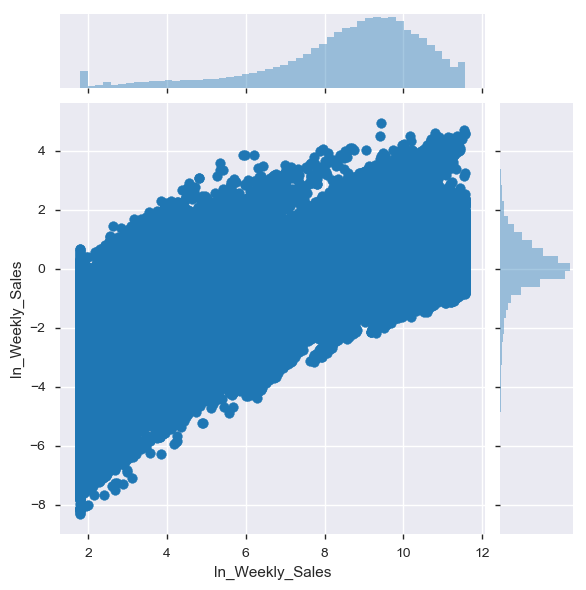

In [67]:
sns.jointplot(  train_y, residuals )

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


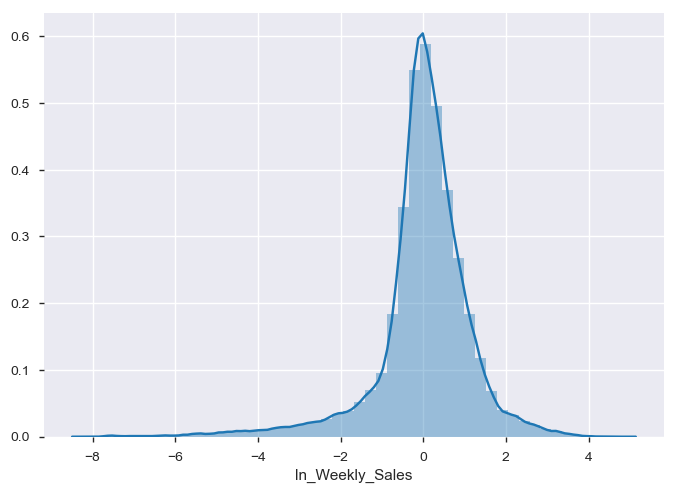

In [68]:
sns.distplot(residuals)

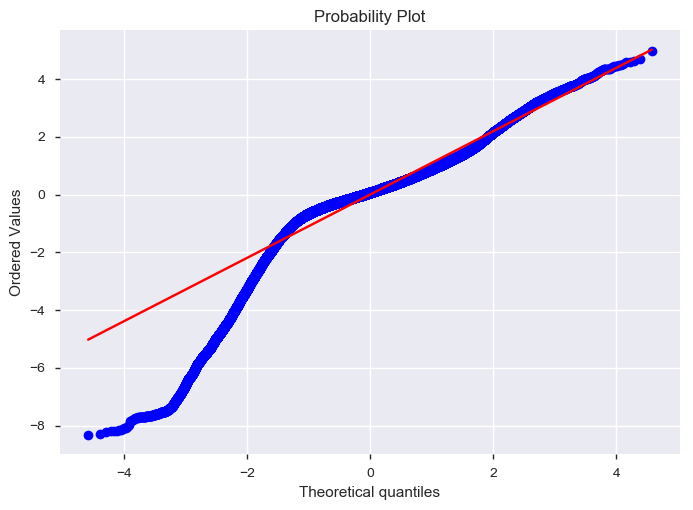

In [69]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [70]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [71]:
linreg = LinearRegression()
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

array([0.66751126, 0.66730083, 0.66556157, 0.66983307, 0.66830014,
       0.66110572, 0.67307753, 0.67494223, 0.67392344, 0.67425704])

#### The model gives the accuracy of around 66% but the data points are very scattered away fron the regression line in Q-Q plot. Importing the clean only X variable - MarkDown and Y variable - Weekly_Sales

In [2]:
sales = pd.read_excel("C:/Users/Sony/Downloads/BA classes/class 20 - final assign/6. WALMART STORE PREDICTION - FORECASTING/sales.xlsx")
sales.head()

,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,ln_Weekly_Sales,MarkDown
0,2010-05-02,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,10.123647,4006.522707
1,2010-12-02,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,10.737277,4006.522707
2,2010-02-19,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,10.635773,4006.522707
3,2010-02-26,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,9.873262,4006.522707
4,2010-05-03,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,9.990990,4006.522707


In [3]:
#Dropping the variables
sales=sales.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [4]:
sales.columns

Index(['Date', 'ln_Weekly_Sales', 'MarkDown'], dtype='object')

In [5]:
sales.set_index(['Date'], inplace = True)
#sales.drop(['Date'], axis=1, inplace=True)
#sales.rename(columns={'ln_Weekly_Sales':'Weekly_Sales'}, inplace=True)
sales.head(5)

,ln_Weekly_Sales,MarkDown
Date,,
2010-05-02,10.123647,4006.522707
2010-12-02,10.737277,4006.522707
2010-02-19,10.635773,4006.522707
2010-02-26,9.873262,4006.522707
2010-05-03,9.990990,4006.522707


Text(0,0.5,'ln_Weekly_Sales')

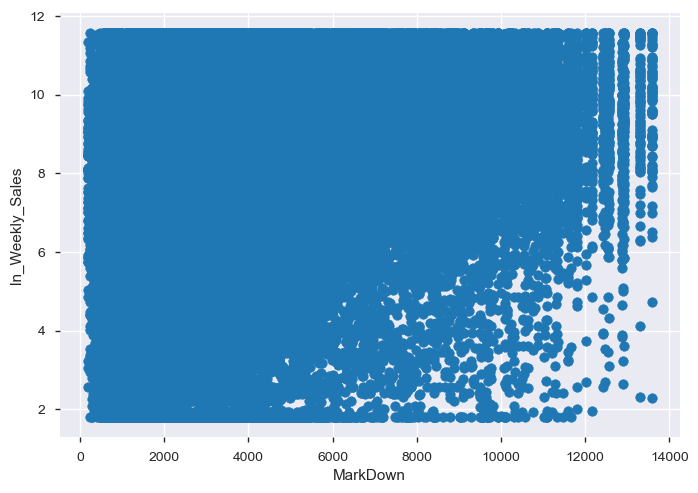

In [91]:
plt.figure()
plt.scatter(x=sales['MarkDown'], y=sales['ln_Weekly_Sales'])
plt.xlabel('MarkDown')
plt.ylabel('ln_Weekly_Sales')

In [6]:
print("Correlation for sales data: {}".format(round(sales.corr()['MarkDown']['ln_Weekly_Sales'], 2)))

Correlation for sales data: 0.09


In [7]:
sales_ts = sales['ln_Weekly_Sales']

In [8]:
sales_ts1 = sales_ts.sample(frac=0.2)
sales_ts1.shape

(84314,)

#### Applying the SARIMAX Model to forecast the sales

In [21]:
model = sm.tsa.statespace.SARIMAX(sales_ts1, order = (1,2,1), seasonal_order= (1,0,0,7),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [22]:
results = model.fit()

In [23]:
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                   ln_Weekly_Sales   No. Observations:                84314
Model:             SARIMAX(1, 2, 1)x(1, 0, 0, 7)   Log Likelihood             -196548.361
Date:                           Sat, 23 Mar 2019   AIC                         393104.721
Time:                                   12:02:26   BIC                         393142.090
Sample:                                        0   HQIC                        393116.150
                                         - 84314                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5003      0.003   -181.326      0.000      -0.506      -0.495
ma.L1         -1.0000      0.019    -53.471

In [9]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(1, 4)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [10]:
pdq

[(1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3)]

In [11]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]

In [12]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [ ]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts1,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [13]:
sales.dropna(inplace=True)
sales.head()

,ln_Weekly_Sales,MarkDown
Date,,
2010-05-02,10.123647,4006.522707
2010-12-02,10.737277,4006.522707
2010-02-19,10.635773,4006.522707
2010-02-26,9.873262,4006.522707
2010-05-03,9.990990,4006.522707


In [14]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts1,
                                       order=(1, 1, 1),
                                       seasonal_order=(1, 1, 0, 7),
                                       enforce_stationarity=True,
                                       enforce_invertibility=True)
best_results = best_model.fit()

C:\Users\Sony\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [16]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                
Dep. Variable:                   ln_Weekly_Sales   No. Observations:                84314
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 7)   Log Likelihood             -196687.171
Date:                           Sat, 23 Mar 2019   AIC                         393382.342
Time:                                   13:21:18   BIC                         393419.711
Sample:                                        0   HQIC                        393393.771
                                         - 84314                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0040      0.004      1.139      0.255      -0.003       0.011
ma.L1         -1.0000      0.003   -339.621

In [13]:
np.power(10, sales_ts1).head()

Date
2011-12-08    1.245017e+09
2012-12-10    2.200827e+11
2011-09-12    1.443849e+09
2010-10-15    2.237015e+08
2010-07-05    5.161603e+09
Name: ln_Weekly_Sales, dtype: float64

In [15]:
pred_dynamic = best_results.get_prediction(full_results=True)

In [16]:
np.power(10, pred_dynamic.predicted_mean)

Date
2011-07-10    1.000000e+00
2012-02-03    7.552268e+09
2012-05-18    5.864815e+06
2011-01-07    1.227883e+07
2011-06-05    4.781159e+07
2011-05-13    4.475760e+09
2010-05-28    4.394876e+08
2012-11-05    6.111560e+14
2010-05-14    1.056069e+05
2012-03-30    5.165283e+07
2012-09-03    1.254762e+09
2010-05-03    4.796005e+11
2010-06-08    2.398106e+09
2010-05-03    1.586347e+10
2010-10-09    9.131387e+08
2012-05-25    3.066313e+07
2010-03-26    3.142878e+06
2012-03-23    5.222763e+07
2010-07-05    8.147774e+04
2010-11-26    4.639168e+05
2012-04-13    1.095745e+07
2012-05-18    1.027015e+06
2010-01-10    5.331400e+04
2011-08-04    1.398171e+08
2011-10-21    5.238661e+06
2012-06-29    3.904682e+05
2012-04-05    8.417666e+07
2010-10-15    9.780691e+07
2010-03-12    1.120415e+07
2010-07-16    4.641152e+04
                  ...     
2012-07-09    1.552412e+08
2012-08-31    6.919044e+06
2012-07-09    1.589227e+09
2012-10-02    1.044372e+10
2010-12-02    4.497362e+05
2011-06-05    2.862355e

In [17]:
forecast = np.power(10,pred_dynamic.predicted_mean)

In [18]:
actual = sales_ts['2011-12-08':]

In [19]:
np.power(10, best_results.forecast(steps=7))

C:\Users\Sony\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


84314    1.479889e+08
84315    3.738408e+09
84316    4.306227e+09
84317    5.332873e+08
84318    2.879612e+06
84319    1.731857e+08
84320    4.835180e+06
dtype: float64

In [20]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 52
pred_uc_99 = best_results.get_forecast(steps=52, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=52, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

C:\Users\Sony\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sony\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [21]:
n_steps = 52
idx = pd.date_range(sales_ts1.index[-1], periods=n_steps, freq='W')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2011-10-23,1.479889e+08,2052.180653,1.067193e+13,2052.180653,1.067193e+13
2011-10-30,3.738408e+09,51840.944758,2.695879e+14,51840.944758,2.695879e+14
2011-11-06,4.306227e+09,59714.967640,3.105351e+14,59714.967640,3.105351e+14
2011-11-13,5.332873e+08,7395.158380,3.845696e+13,7395.158380,3.845696e+13
2011-11-20,2.879612e+06,39.931927,2.076576e+11,39.931927,2.076576e+11


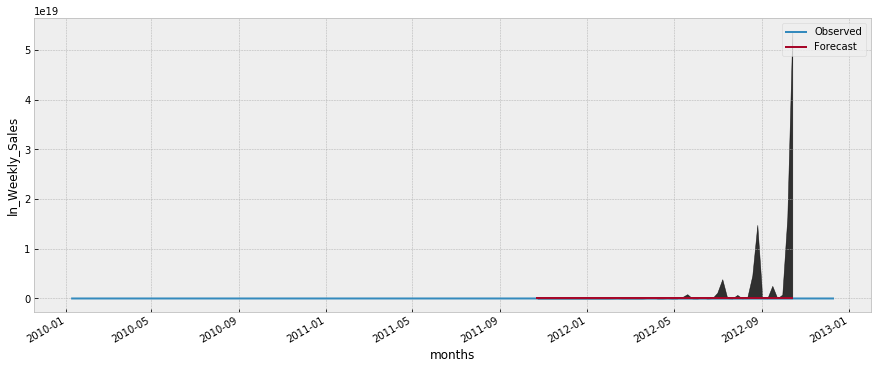

In [24]:
# plot the forecast along with the confidence band
axis = sales_ts1.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=2.0)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.8)
axis.set_xlabel('months')
axis.set_ylabel('ln_Weekly_Sales')
plt.legend(loc='best')
plt.show()